<a href="https://colab.research.google.com/github/Ashkabsha/TimeSeries/blob/main/bi_lstm_PRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Packages

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import yfinance as yf
from keras.initializers import RandomNormal
from keras.layers import Bidirectional

In [ ]:


stock_symbol = 'AAPL'
df = yf.download(stock_symbol,period="60mo",interval="1d")
print(df.head())

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-09-27  55.955002  56.610001  55.884998  56.237499  53.860542  120724800
2018-09-28  56.197498  56.459999  56.005001  56.435001  54.049690   91717600
2018-10-01  56.987499  57.355000  56.587502  56.814999  54.413643   94403200
2018-10-02  56.812500  57.500000  56.657501  57.320000  54.897301   99152800
2018-10-03  57.512501  58.367500  57.445000  58.017502  55.565308  114619200


Importing Data

In [ ]:
df.index = df.index.strftime('%Y-%m-%d')

In [ ]:
df


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-27,55.955002,56.610001,55.884998,56.237499,53.860542,120724800
2018-09-28,56.197498,56.459999,56.005001,56.435001,54.049690,91717600
2018-10-01,56.987499,57.355000,56.587502,56.814999,54.413643,94403200
2018-10-02,56.812500,57.500000,56.657501,57.320000,54.897301,99152800
2018-10-03,57.512501,58.367500,57.445000,58.017502,55.565308,114619200
...,...,...,...,...,...,...
2023-09-20,179.259995,179.699997,175.399994,175.490005,175.490005,58436200
2023-09-21,174.550003,176.300003,173.860001,173.929993,173.929993,63047900
2023-09-22,174.669998,177.080002,174.050003,174.789993,174.789993,56663000


In [ ]:
len(df)

1257

<Axes: xlabel='Date'>

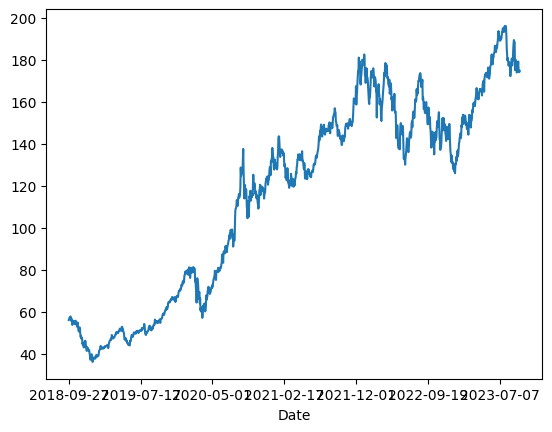

In [ ]:
df['Open'].plot()

In [ ]:
b_size=16
epoch=100
train_per=0.8
w_size=7
f_size=10

In [ ]:
t_size=int(len(df)*train_per)

Train-Test Split

In [ ]:
training = df.iloc[:t_size, 1:2].values
testing = df.iloc[t_size:, 1:2].values

Normalization

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
training_scaled = sc.fit_transform(training)

Create target values

In [ ]:
x_train = []
y_train = []
for iter in range(w_size, t_size):
    x_train.append(training_scaled[iter-w_size:iter, 0])
    y_train.append(training_scaled[iter, 0])
x_train, y_train=np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

Defining Model

In [ ]:
initializer = RandomNormal(mean=0.0, stddev=0.05)
algo = Sequential()
# algo.add(LSTM((units = 60, return_sequences = True, input_shape = (x_train.shape[1], 1),kernel_initializer=initializer)))
# algo.add(Dropout(0.2))
# algo.add(LSTM(units = 60, return_sequences = True))
# algo.add(Dropout(0.2))
# algo.add(LSTM(units = 60, return_sequences = True))
# algo.add(Dropout(0.2))
# algo.add(LSTM(units = 60))
# algo.add(Dropout(0.2))
# algo.add(Dense(units = 1))
algo.add(Bidirectional(LSTM(50, activation='relu',input_shape = (x_train.shape[1], 1),kernel_initializer=initializer)))
algo.add(Dense(1))
algo.compile(optimizer = 'adam', loss = 'mean_squared_error')
#print(algo.summary())


Training Model

In [ ]:
algo.fit(x_train, y_train, epochs = epoch, batch_size = b_size, validation_split=0.15,verbose=2)

Epoch 1/100
53/53 - 4s - loss: 0.0842 - val_loss: 0.0084 - 4s/epoch - 67ms/step
Epoch 2/100
53/53 - 1s - loss: 0.0015 - val_loss: 0.0014 - 1s/epoch - 19ms/step
Epoch 3/100
53/53 - 1s - loss: 5.7783e-04 - val_loss: 0.0017 - 958ms/epoch - 18ms/step
Epoch 4/100
53/53 - 1s - loss: 4.5597e-04 - val_loss: 0.0013 - 1s/epoch - 19ms/step
Epoch 5/100
53/53 - 1s - loss: 4.5900e-04 - val_loss: 0.0013 - 1s/epoch - 19ms/step
Epoch 6/100
53/53 - 1s - loss: 4.7520e-04 - val_loss: 0.0012 - 650ms/epoch - 12ms/step
Epoch 7/100
53/53 - 1s - loss: 4.5603e-04 - val_loss: 0.0012 - 620ms/epoch - 12ms/step
Epoch 8/100
53/53 - 1s - loss: 4.5600e-04 - val_loss: 0.0012 - 596ms/epoch - 11ms/step
Epoch 9/100
53/53 - 1s - loss: 4.4179e-04 - val_loss: 0.0011 - 556ms/epoch - 10ms/step
Epoch 10/100
53/53 - 1s - loss: 4.3417e-04 - val_loss: 0.0013 - 623ms/epoch - 12ms/step
Epoch 11/100
53/53 - 1s - loss: 4.8454e-04 - val_loss: 0.0012 - 644ms/epoch - 12ms/step
Epoch 12/100
53/53 - 1s - loss: 4.8554e-04 - val_loss: 0.0011

Dividing Test values into groups

In [ ]:
data_train = df.iloc[:t_size, 1:2]
data_test = df.iloc[t_size:, 1:2]
data_total = df.iloc[:,1:2]
total_input = data_total[len(data_total) - len(data_test) - w_size:].values
total_input = total_input.reshape(-1, 1)
total_input = sc.transform(total_input)
x_test = []
y_test=[]

# Calculate the maximum number of sequences of length w_size that can be created
max_sequences = len(total_input) - w_size

# loop to create a 2D array of x_test
for iter in range(max_sequences):
    x_test.append(total_input[iter:iter+w_size, 0])
    y_test.append(total_input[iter+w_size, 0])     #new addition

x_test = np.array(x_test)

print(x_test.shape)  #  (max_sequences, w_size)


(252, 7)


Prediction

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_price = algo.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)


8/8 [==============================] - 0s 5ms/step


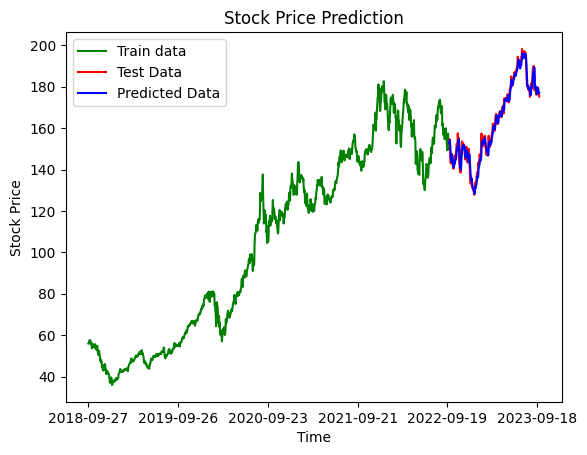

In [ ]:
df.reset_index(inplace=True)
plt.plot(df.loc[:t_size+1,'Date'],df.loc[:t_size+1,'Open'], color='green',label="Train data")
plt.plot(df.loc[t_size:, 'Date'],data_test.values, color = 'red', label = 'Test Data')
plt.plot(df.loc[t_size:, 'Date'],predicted_price, color = 'blue', label = 'Predicted Data')
plt.xticks(np.arange(0,df.shape[0],250))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


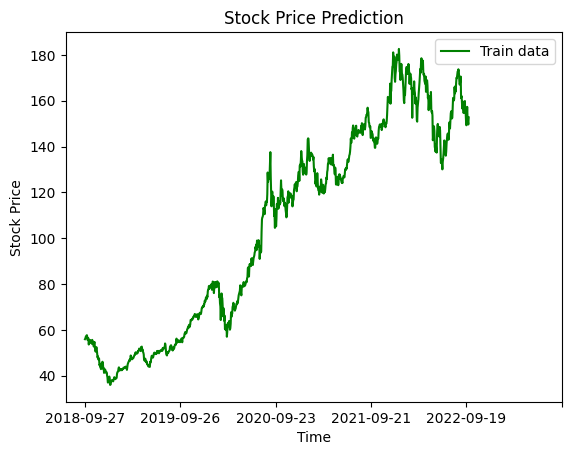

In [ ]:
plt.plot(df.loc[:t_size+1,'Date'],df.loc[:t_size+1,'Open'], color='green',label="Train data")

plt.xticks(np.arange(0,df.shape[0],250))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

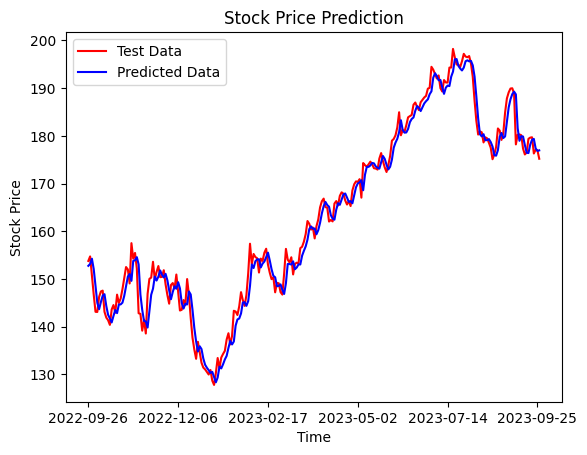

In [ ]:
plt.plot(df.loc[t_size:, 'Date'],data_test.values, color = 'red', label = 'Test Data')
plt.plot(df.loc[t_size:, 'Date'],predicted_price, color = 'blue', label = 'Predicted Data')
plt.xticks(np.arange(0,x_test.shape[0],50))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(data_test.values,predicted_price)

mse = mean_squared_error(data_test.values, predicted_price)

rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Mean Absolute Error (MAE): 2.11
Mean Squared Error (MSE): 7.53
Root Mean Squared Error (RMSE): 2.74


Predict Future

In [ ]:
test2=testing.copy()
for i in range(f_size):
  X=test2[-w_size:]
  X=X.reshape(w_size,1)
  X=sc.fit_transform(X)

  X=np.reshape(X,(1,w_size,1))

  close=algo.predict(X)
  y=sc.inverse_transform(close)

  test2=np.append(test2, y)


1/1 [==============================] - 0s 23ms/step


In [ ]:
from datetime import datetime, timedelta
x=df.loc[-1:, 'Date']
day=x[len(x)-1]
date_obj = datetime.strptime(day, '%Y-%m-%d')
start_date = date_obj
date_list = [(start_date + timedelta(days=i)).strftime('%Y-%m-%d') for i in range(f_size)]

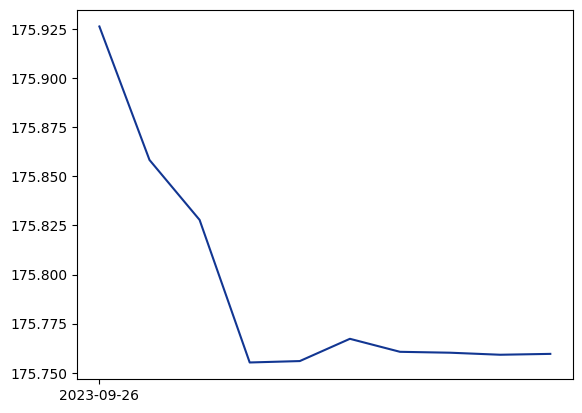

In [ ]:
forcasted_data=test2[-f_size:]
plt.plot(date_list,forcasted_data,color="#123692", label="Future data")
plt.xticks(np.arange(0,len(forcasted_data),f_size))
plt.show()

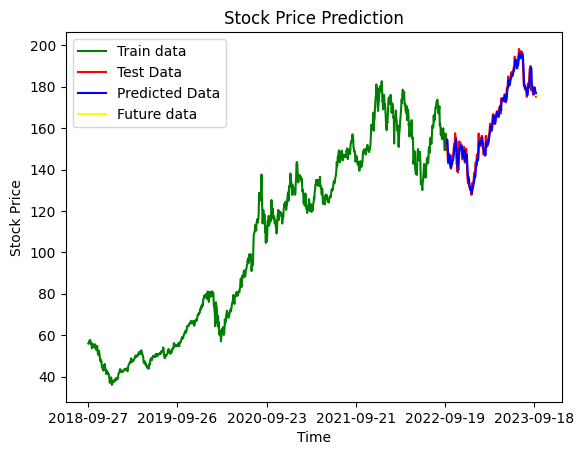

In [ ]:

plt.plot(df.loc[:t_size,'Date'],df.loc[:t_size,'Open'], color='green',label="Train data")
plt.plot(df.loc[t_size:, 'Date'],data_test.values, color = 'red', label = 'Test Data')
plt.plot(df.loc[t_size:, 'Date'],predicted_price, color = 'blue', label = 'Predicted Data')
plt.plot(date_list,forcasted_data,color='yellow', label="Future data")
plt.xticks(np.arange(0,df.shape[0],250))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

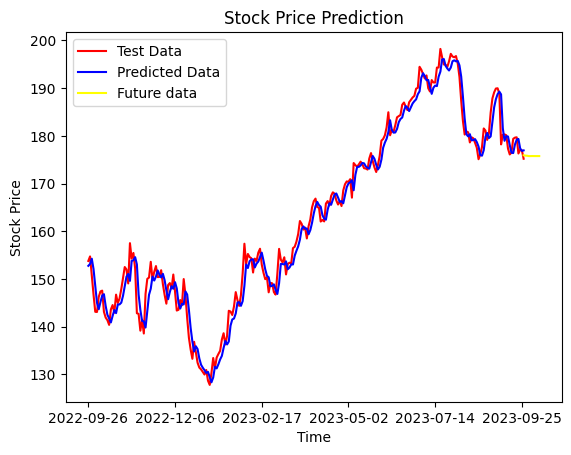

In [ ]:
plt.plot(df.loc[t_size:, 'Date'],data_test.values, color = 'red', label = 'Test Data')
plt.plot(df.loc[t_size:, 'Date'],predicted_price, color = 'blue', label = 'Predicted Data')
plt.plot(date_list,forcasted_data,color='yellow', label="Future data")
plt.xticks(np.arange(0,x_test.shape[0],50))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
forcasted_data

array([175.92636108, 175.85838318, 175.82785034, 175.75523376,
       175.75595093, 175.76728821, 175.76066589, 175.76020813,
       175.75917053, 175.75961304])

In [ ]:
data_test.values[-30:]

array([[179.47999573],
       [178.53999329],
       [177.50999451],
       [175.1000061 ],
       [176.13000488],
       [177.67999268],
       [181.55000305],
       [181.1000061 ],
       [179.1499939 ],
       [180.58999634],
       [184.8999939 ],
       [187.8500061 ],
       [189.11999512],
       [189.91999817],
       [189.97999573],
       [188.8500061 ],
       [178.21000671],
       [180.24000549],
       [180.30000305],
       [180.13000488],
       [177.30000305],
       [176.1000061 ],
       [176.5       ],
       [179.38000488],
       [179.63000488],
       [179.69999695],
       [176.30000305],
       [177.08000183],
       [176.97000122],
       [175.19999695]])